In [85]:
import nltk

nltk.download("inaugural")
from nltk.corpus import inaugural

TARGET_PRESIDENT = "Monroe"
NON_TARGET_PRESIDENT = "Obama"

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [86]:
presidents = set([fileid[5:-4] for fileid in inaugural.fileids()])
president_data_dict = {}

for index, president in enumerate(presidents):
    speeches = [inaugural.sents(file_id) for file_id in inaugural.fileids() if president in file_id]
    sent_num = len([sent for speech in speeches for sent in speech])
    president_data_dict[president] = sent_num

sorted_dict: dict[str, int] = dict(
    sorted(president_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, president_item in enumerate(sorted_dict.items()):
    print(f"#{idx + 1}: {president_item[0]} - {president_item[1]}")


#1: Harrison - 367
#2: Bush - 337
#3: Roosevelt - 308
#4: Reagan - 253
#5: Monroe - 251
#6: McKinley - 230
#7: Eisenhower - 215
#8: Obama - 204
#9: Coolidge - 197
#10: Clinton - 193
#11: Nixon - 175
#12: Biden - 170
#13: Lincoln - 165
#14: Taft - 159
#15: Hoover - 158
#16: Polk - 153
#17: Harding - 149
#18: Wilson - 128
#19: Truman - 116
#20: Garfield - 112
#21: Adams - 111
#22: Pierce - 104
#23: Cleveland - 102
#24: VanBuren - 95
#25: Johnson - 94
#26: Trump - 90
#27: Buchanan - 89
#28: Jefferson - 87
#29: Grant - 85
#30: Hayes - 59
#31: Jackson - 55
#32: Madison - 54
#33: Carter - 53
#34: Kennedy - 52
#35: Washington - 28
#36: Taylor - 22


In [87]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")

nontarget_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if NON_TARGET_PRESIDENT in file_id
]
target_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if TARGET_PRESIDENT in file_id
]

nontarget_sents = [sent for speech in nontarget_speeches for sent in speech]
target_sents = [sent for speech in target_speeches for sent in speech]

print(f"Speaker: President {NON_TARGET_PRESIDENT}, {len(nontarget_sents)} sentences")
for sent in nontarget_sents:
    print(" ".join(sent))


Speaker: President Obama, 204 sentences
My fellow citizens :
I stand here today humbled by the task before us , grateful for the trust you have bestowed , mindful of the sacrifices borne by our ancestors .
I thank President Bush for his service to our nation , as well as the generosity and cooperation he has shown throughout this transition .
Forty - four Americans have now taken the presidential oath .
The words have been spoken during rising tides of prosperity and the still waters of peace .
Yet , every so often the oath is taken amidst gathering clouds and raging storms .
At these moments , America has carried on not simply because of the skill or vision of those in high office , but because We the People have remained faithful to the ideals of our forbearers , and true to our founding documents .
So it has been .
So it must be with this generation of Americans .
That we are in the midst of crisis is now well understood .
Our nation is at war , against a far - reaching network of v

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [88]:
print(f"Speaker: President {TARGET_PRESIDENT}, {len(target_sents)} sentences")
for sent in target_sents:
    print(" ".join(sent))

Speaker: President Monroe, 251 sentences
I should be destitute of feeling if I was not deeply affected by the strong proof which my fellow - citizens have given me of their confidence in calling me to the high office whose functions I am about to assume .
As the expression of their good opinion of my conduct in the public service , I derive from it a gratification which those who are conscious of having done all that they could to merit it can alone feel .
MY sensibility is increased by a just estimate of the importance of the trust and of the nature and extent of its duties , with the proper discharge of which the highest interests of a great and free people are intimately connected .
Conscious of my own deficiency , I cannot enter on these duties without great anxiety for the result .
From a just responsibility I will never shrink , calculating with confidence that in my best efforts to promote the public welfare my motives will always be duly appreciated and my conduct be viewed wit

In [89]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for sent in nontarget_sents + target_sents:
    all_tags.update(fc.all_pos_frequency(sent).keys())

print(all_tags)

{'WRB', 'NNPS', 'PRP', 'DT', 'NNP', ':', 'RB', ',', 'JJR', '$', 'WDT', 'EX', 'VBZ', 'PDT', 'VBP', 'VBN', '.', 'VBG', 'WP$', 'RBS', 'NN', 'NNS', 'IN', '(', 'JJS', 'RBR', "''", 'VBD', 'JJ', 'SYM', 'VB', 'PRP$', 'RP', 'WP', 'TO', 'CC', 'POS', 'MD', 'CD'}


In [90]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for b_sent in nontarget_sents:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_sent in target_sents:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))

,word variation,uncommon word frequency,sentence length,average word length,WRB,NNPS,PRP,DT,NNP,:,...,SYM,VB,PRP$,RP,WP,TO,CC,POS,MD,CD
0,1.000000,1.000000,4,4.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.0,0.0,0.250000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.857143,0.571429,28,4.178571,0.0,0.000000,0.035714,0.107143,0.000000,0.000000,...,0.0,0.0,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.960000,0.560000,25,4.560000,0.0,0.000000,0.040000,0.040000,0.040000,0.000000,...,0.0,0.0,0.040000,0.0,0.0,0.040000,0.040000,0.0,0.0,0.000000
3,1.000000,0.727273,11,4.636364,0.0,0.090909,0.000000,0.090909,0.090909,0.090909,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.090909
4,0.941176,0.588235,17,4.470588,0.0,0.000000,0.000000,0.058824,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.0,0.000000
5,1.000000,0.750000,16,4.187500,0.0,0.000000,0.000000,0.062500,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.062500,0.0,0.0,0.000000
6,0.795455,0.500000,44,4.227273,0.0,0.000000,0.022727,0.022727,0.022727,0.000000,...,0.0,0.0,0.045455,0.0,0.0,0.045455,0.022727,0.0,0.0,0.000000
7,1.000000,0.400000,5,2.400000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
8,1.000000,0.500000,10,4.000000,0.0,0.100000,0.100000,0.100000,0.000000,0.000000,...,0.0,0.1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.1,0.000000
9,1.000000,0.461538,13,3.615385,0.0,0.000000,0.076923,0.076923,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [91]:
print(df.dtypes)

word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
WRB                        float64
NNPS                       float64
PRP                        float64
DT                         float64
NNP                        float64
:                          float64
RB                         float64
,                          float64
JJR                        float64
$                          float64
WDT                        float64
EX                         float64
VBZ                        float64
PDT                        float64
VBP                        float64
VBN                        float64
.                          float64
VBG                        float64
WP$                        float64
RBS                        float64
NN                         float64
NNS                        float64
IN                         float64
(                          float64
JJS                 

In [92]:
print(df.isna().sum())


word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
WRB                        0
NNPS                       0
PRP                        0
DT                         0
NNP                        0
:                          0
RB                         0
,                          0
JJR                        0
$                          0
WDT                        0
EX                         0
VBZ                        0
PDT                        0
VBP                        0
VBN                        0
.                          0
VBG                        0
WP$                        0
RBS                        0
NN                         0
NNS                        0
IN                         0
(                          0
JJS                        0
RBR                        0
''                         0
VBD                        0
JJ                         0
SYM                        0
VB            

In [93]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")

auc-rocスコア: 0.7970328282828282


In [94]:
display(pd.crosstab(y_test, y_pred))

col_0,False,True
row_0,,
False,29,19
True,15,51


In [95]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


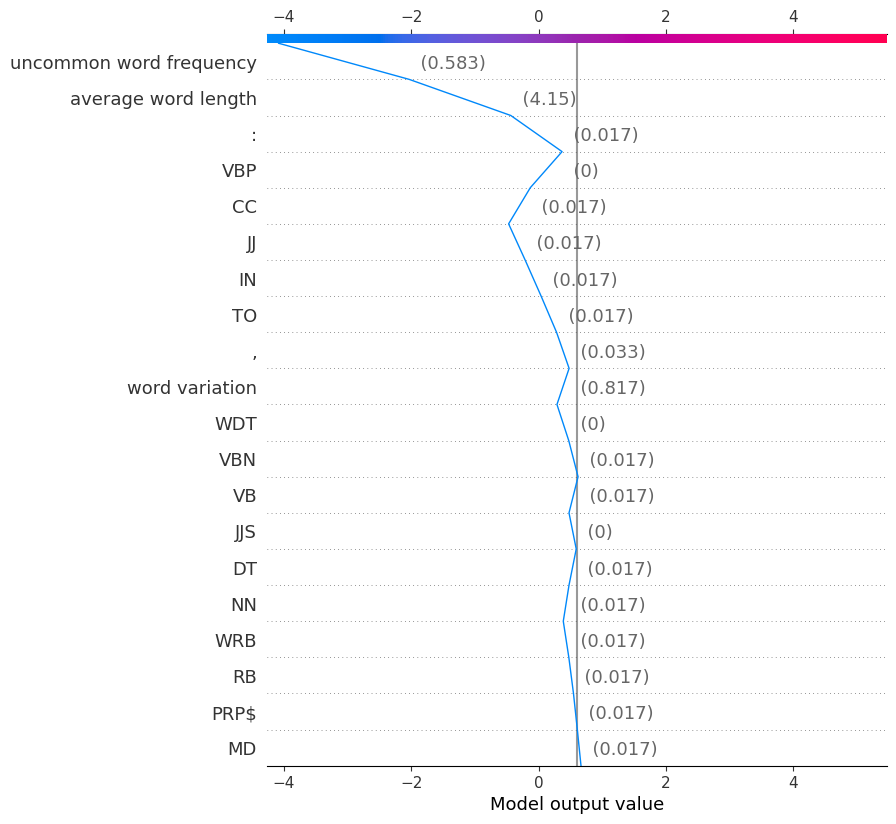

In [96]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


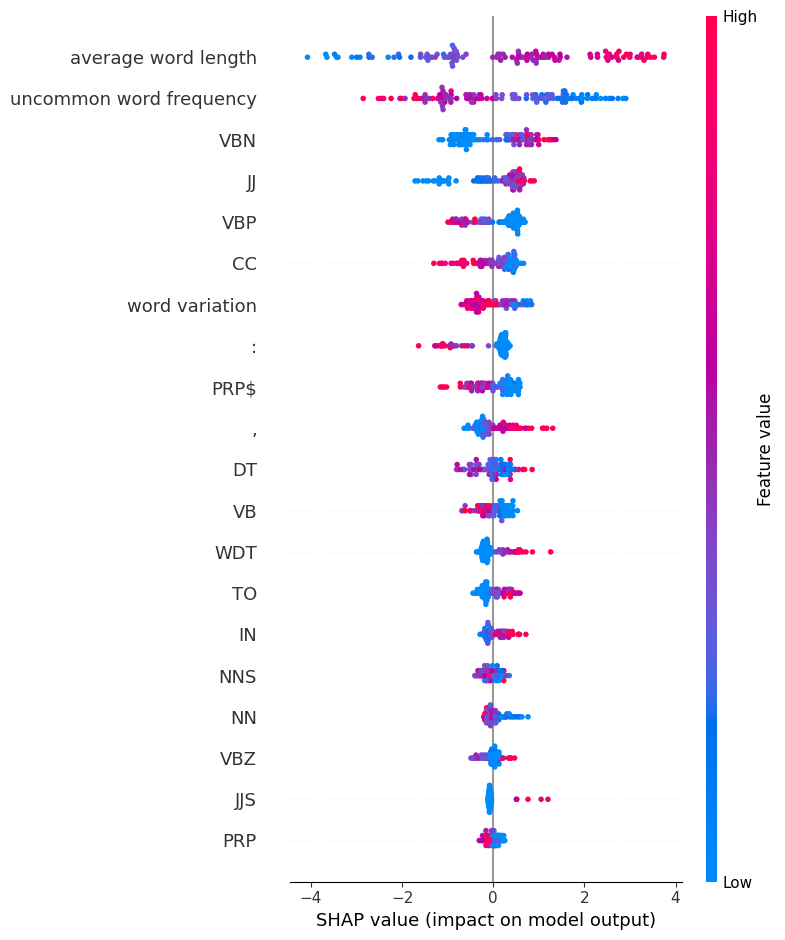

In [97]:
shap.summary_plot(sv_test, X_test)

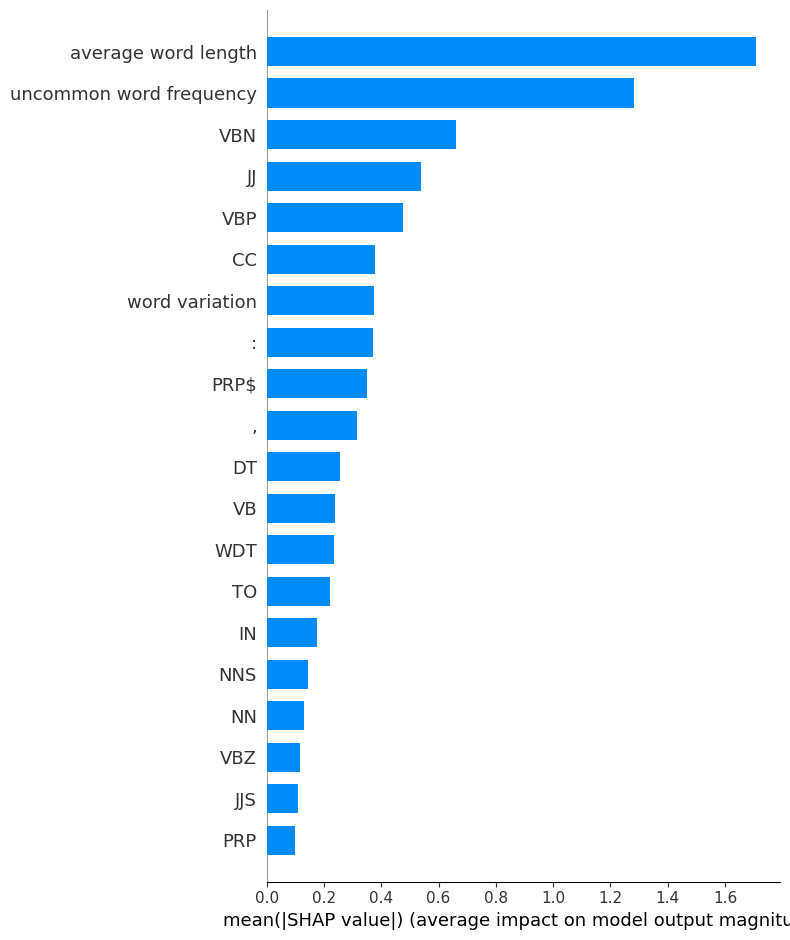

In [98]:
shap.summary_plot(sv_test, X_test, plot_type="bar")